# Import Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten 
from tensorflow.keras.losses import categorical_crossentropy

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

from skimage.color import rgb2gray
from skimage import img_as_ubyte

import numpy as np
import pandas as pd

# Load Data

In [16]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [17]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


# Explore the Data

In [18]:
pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,...,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,...,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,...,0,0,0,0,0,0,0,0,0,0


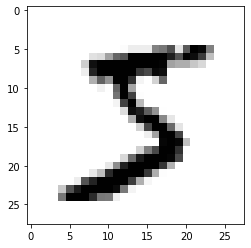

In [19]:
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# Preprocess the Data 

In [20]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [21]:
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

x_train: (60000, 28, 28, 1)
y_train: (60000,)
x_test: (10000, 28, 28, 1)
y_test: (10000,)


In [22]:
# ## convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
#normalize the data
x_train = x_train / 255
x_test = x_test / 255

In [42]:
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')

# Build the Model

In [11]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2359552   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

# Compile and Train the Model

In [12]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
# implementing early stopping and model check point 
es = EarlyStopping(monitor= "val_accuracy" , min_delta= 0.01, patience= 3, verbose=1)
mc = ModelCheckpoint(filepath="bestmodel.h5", monitor="val_accuracy", verbose=1, save_best_only= True)

In [47]:
hist = model.fit(x_train,y_train, epochs= 10, validation_data= (x_test,y_test) , callbacks=[es,mc])

Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.1484 - accuracy: 0.9543
Epoch 00001: val_accuracy improved from -inf to 0.98660, saving model to bestmodel.h5
1875/1875 [==============================] - 118s 63ms/step - loss: 0.1484 - accuracy: 0.9543 - val_loss: 0.0399 - val_accuracy: 0.9866
Epoch 2/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0633 - accuracy: 0.9803
Epoch 00002: val_accuracy improved from 0.98660 to 0.98900, saving model to bestmodel.h5
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0633 - accuracy: 0.9803 - val_loss: 0.0358 - val_accuracy: 0.9890
Epoch 3/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9861
Epoch 00003: val_accuracy improved from 0.98900 to 0.99150, saving model to bestmodel.h5
1875/1875 [==============================] - 598s 319ms/step - loss: 0.0450 - accuracy: 0.9861 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 4/10
1875/1875 [===========

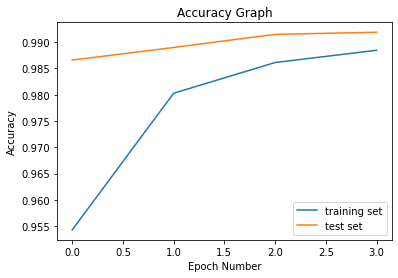

In [48]:
plt.title('Accuracy Graph')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'], label='training set')
plt.plot(hist.history['val_accuracy'], label='test set')
plt.legend()

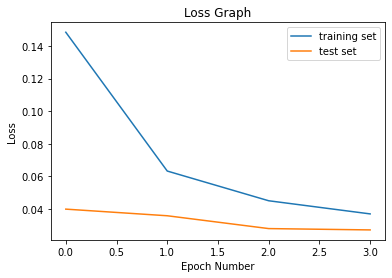

In [49]:
plt.title('Loss Graph')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(hist.history['loss'], label='training set')
plt.plot(hist.history['val_loss'], label='test set')
plt.legend()

# Evaluate Model Accuracy

In [50]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)

1875/1875 [==============================] - 21s 11ms/step - loss: 0.0114 - accuracy: 0.9964


In [51]:
#training set accuracy
print('Training loss: ', train_loss*100)
print('Training accuracy: ', train_accuracy*100)

Training loss:  1.1443465948104858
Training accuracy:  99.6399998664856


In [52]:
validation_loss, validation_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.0272 - accuracy: 0.9919


In [53]:
#testing set accuracy
print('Validation loss: ', validation_loss*100)
print('Validation accuracy: ', validation_accuracy*100)

Validation loss:  2.7155304327607155
Validation accuracy:  99.19000267982483


In [13]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
model = load_model("bestmodel.h5")
print('Confusion Matrix')

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)

cf_matrix=confusion_matrix(np.argmax(y_test,axis=1), y_pred)
print(cf_matrix)

Confusion Matrix
[[ 975    0    0    0    0    0    2    1    2    0]
 [   0 1129    1    1    0    1    1    1    1    0]
 [   1    0 1024    0    2    0    0    5    0    0]
 [   0    0    2 1003    0    2    0    1    2    0]
 [   0    0    0    0  976    0    5    0    0    1]
 [   0    0    1    6    0  884    1    0    0    0]
 [   2    2    0    0    1    1  951    0    1    0]
 [   0    0    7    0    0    0    0 1020    1    0]
 [   0    0    2    1    0    0    1    1  969    0]
 [   0    0    0    0    7    6    0    4    4  988]]


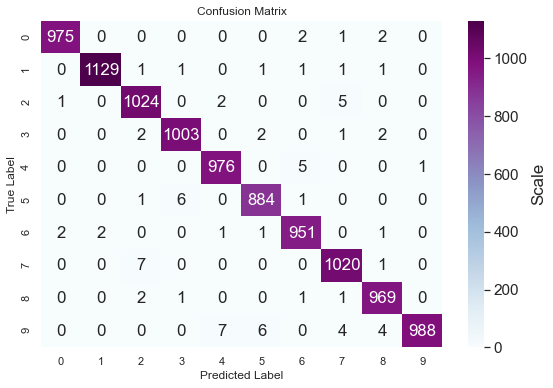

In [16]:
sns.set(color_codes=True)
plt.figure(1, figsize=(9, 6))

plt.title("Confusion Matrix")

sns.set(font_scale=1.4)
ax = sns.heatmap(cf_matrix, annot=True, cmap="BuPu", cbar_kws={'label': 'Scale'}, fmt='d')

ax.set(ylabel="True Label", xlabel="Predicted Label")

plt.show()

# Use the model (do predictions)

In [26]:
from tensorflow.keras.models import load_model
import cv2
from skimage.color import rgb2gray
from skimage import img_as_ubyte
import numpy as np

model = load_model('bestmodel.h5')

def predict(img):
    img = cv2.imread(img)
    img_gray = rgb2gray(img)
    img_gray_u8 = img_as_ubyte(img_gray)

    (thresh, im_binary) = cv2.threshold(img_gray_u8, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    img_resized = cv2.resize(im_binary,(28,28))

    im_gray_invert = 255 - img_resized
    im_final = im_gray_invert.reshape(1,28,28,1)

    ans = model.predict(im_final)
    ans = np.argmax(ans,axis=1)[0]
    print(ans)

In [27]:
predict('2.png')

2
[[[255 255 253]
  [255 255 253]
  [252 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 253]
  [255 255 253]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 255 255]
  [255 255 255]
  [255 253 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
